In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape


(10000, 14)

In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
dataset.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [9]:
dataset.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
dataset.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

## Boxplot

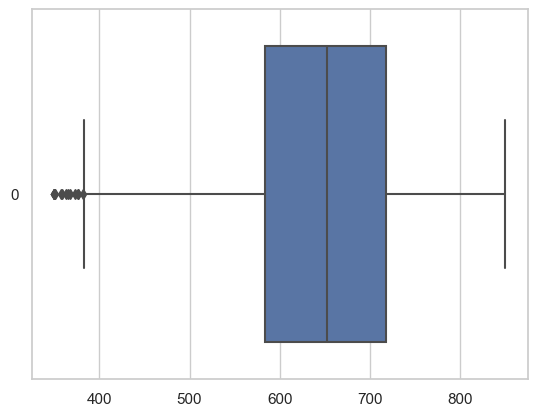

In [12]:
#  pour trouve les valeur aberrante
sns.set(style="whitegrid")
ax = sns.boxplot(data = dataset['CreditScore'], orient ="h") #orient:horizontal  v : vertical 

In [14]:
IQR = dataset['CreditScore'].quantile(0.75)-dataset['CreditScore'].quantile(0.25) 
IQR

134.0

In [20]:
#exercice:seuilmax/seuilmin
q1 = dataset['Age'].quantile(0.25)
print("quantile",q1)
q3 = dataset['Age'].quantile(0.75)
print("quantile",q3)
IQR = q3-q1
print("IQR",IQR)
seuil_max = q3 + 1.5*IQR
print("seuil_max",seuil_max)
seuil_min = q1 - 1.5*IQR
print("seuil_min",seuil_min)

quantile 32.0
quantile 44.0
IQR 12.0
seuil_max 62.0
seuil_min 14.0


In [22]:
Inf = dataset['CreditScore'].quantile(0.25)-1.5*IQR
Inf

566.0

In [23]:
dataset[dataset['CreditScore']>Inf].count()

RowNumber          7990
CustomerId         7990
Surname            7990
CreditScore        7990
Geography          7990
Gender             7990
Age                7990
Tenure             7990
Balance            7990
NumOfProducts      7990
HasCrCard          7990
IsActiveMember     7990
EstimatedSalary    7990
Exited             7990
dtype: int64

In [24]:
sup = dataset['CreditScore'].quantile(0.75)+ 1.5 *IQR

In [25]:
sup

736.0

In [40]:
my_list=['Age','CreditScore','EstimatedSalary']
my_list

['Age', 'CreditScore', 'EstimatedSalary']

In [41]:
dataset[my_list].head()

,Age,CreditScore,EstimatedSalary
0,42,619,101348.88
1,41,608,112542.58
2,42,502,113931.57
3,39,699,93826.63
4,43,850,79084.10


## boxPlot bvarie

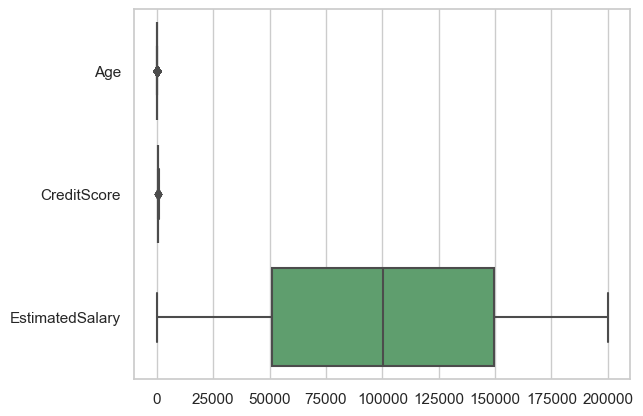

In [42]:
ax = sns.boxplot(data = dataset[my_list], orient ='h')

Problème: problème de grandeur (les variables ne sont pas la meme echelle )
je suis dans le cas de classification : calcul des distances
Probleme de grandir-->transformation --> données proches sur mm echelle

Text(0, 0.5, 'CreditScore')

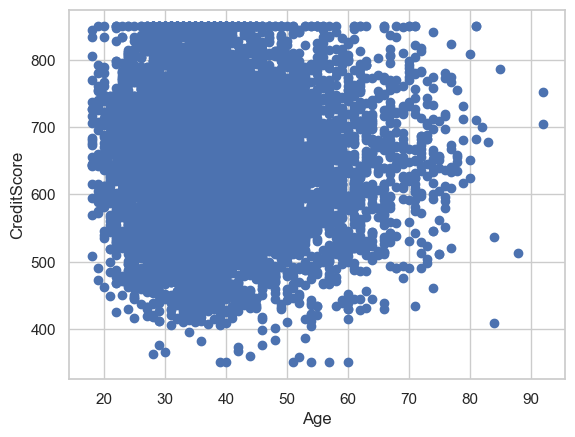

In [43]:
plt.scatter(x = dataset['Age'],y=dataset['CreditScore'])
plt.xlabel('Age')
plt.ylabel('CreditScore')

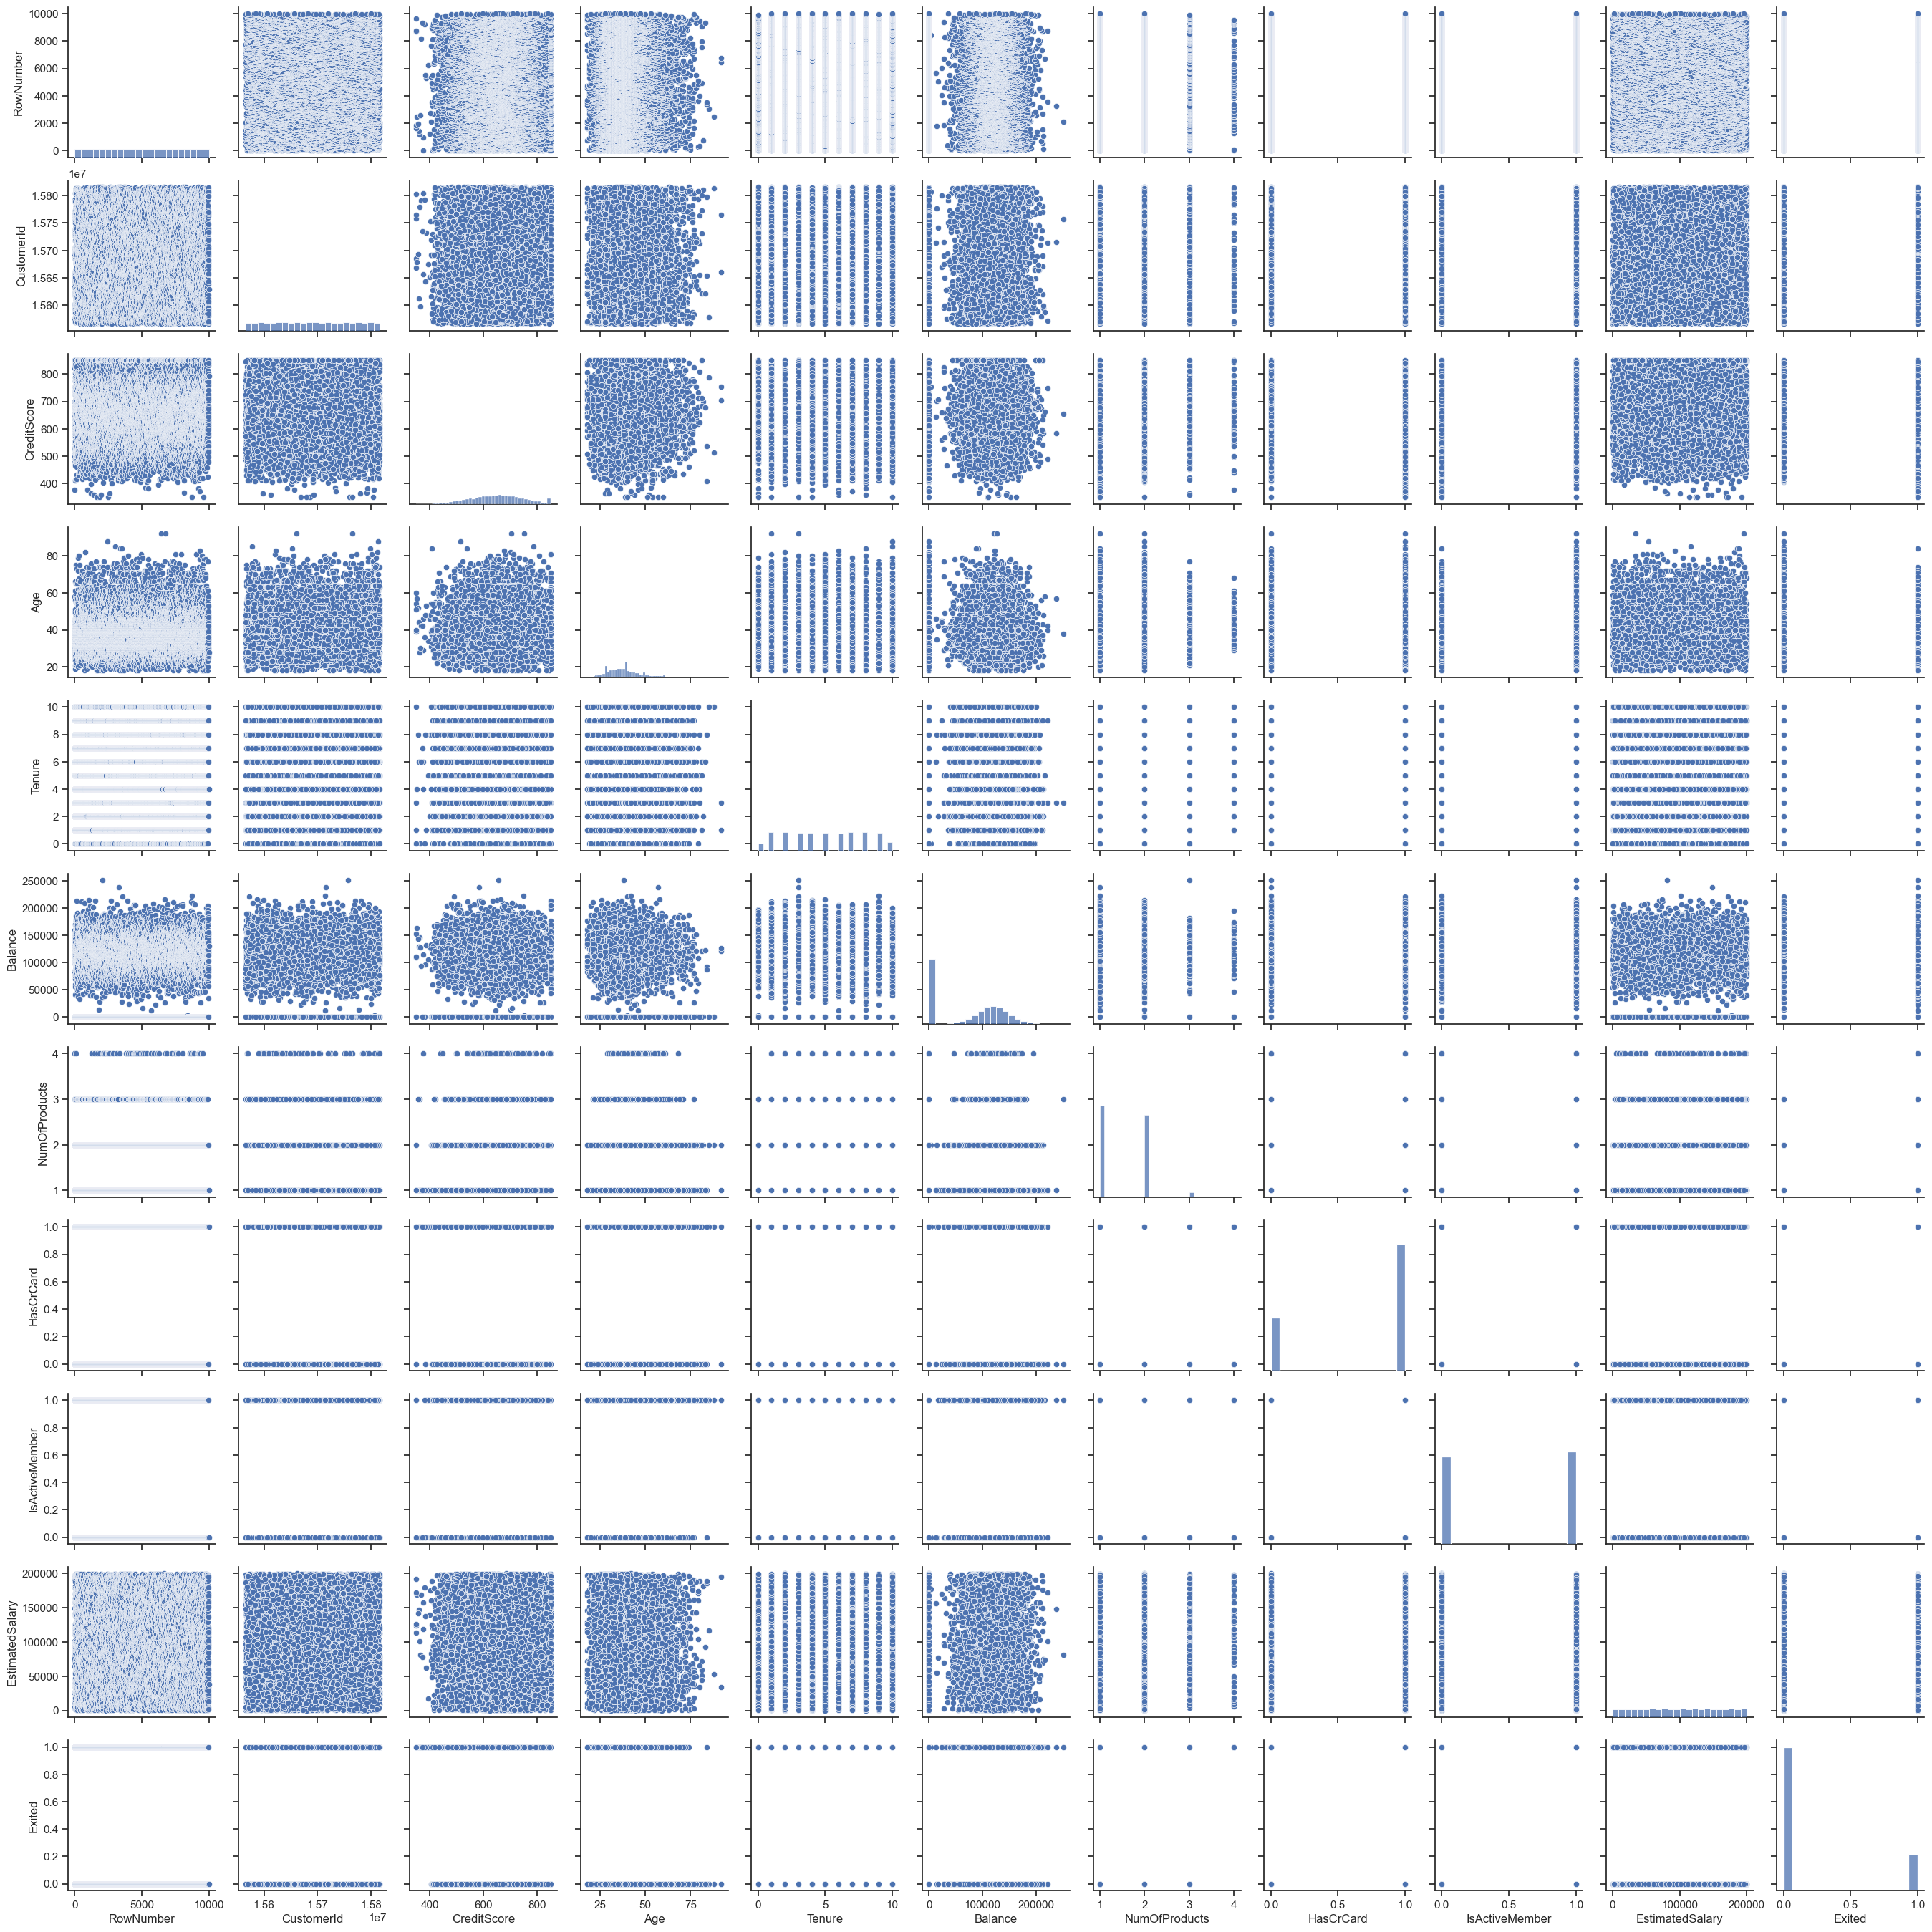

In [46]:
sns.set(style='ticks')
sns.pairplot(dataset)

In [47]:
# selection des colonnes numérique
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])
#calcul de la matrice de corrélation
correlations = numeric_data.corr(method='pearson')# Méthodes disponibles : 'pearson', 'spearman', 'kendall'
correlations

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

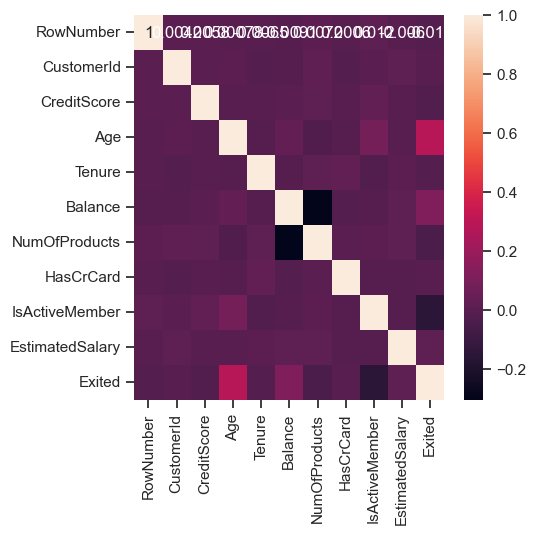

In [48]:
#matrice de correlation
F, ax = plt.subplots(figsize =(5,5))
sns.heatmap(correlations,annot = True)#heatmap la matrice = correlations # annot notation pour affiche les chiffre dans une case
# le bien correlation   =1

In [ ]:
#phase1 : saparer x et y

In [51]:
X = dataset.iloc[:,3:13] #eliminier les colonnes (rownumbers /custmerid/surname ) acune inflience  bel target
Y = dataset.iloc[:,13]

In [52]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [53]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [56]:
type(X)

pandas.core.frame.DataFrame

## Convert DataFrame to Numpy Array

In [57]:
#Phase2 CONVERTIR pandas --> numpy
X = X.values
Y = Y.values

In [58]:
type(X)

numpy.ndarray

In [59]:
type(Y)

numpy.ndarray

In [60]:
X[0:5,:]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

## Encoding categorical data

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])
X[:,2] = le.fit_transform(X[:,2])
X[0:10,:]

array([[619, 0, 0, 24, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 0, 23, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 0, 24, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 0, 21, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 0, 25, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 1, 26, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 1, 32, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 0, 11, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 1, 26, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 1, 9, 2, 134603.88, 1, 1, 1, 71725.73]], dtype=object)

In [67]:
X.shape

(10000, 10)

In [68]:
from sklearn.preprocessing import OneHotEncoder# pour cree trois colum  frane span germany 
from sklearn.compose import ColumnTransformer


In [69]:
ct = ColumnTransformer([('Geography',OneHotEncoder(),[1])],\
                      remainder = 'passthrough')

In [70]:
X = ct.fit_transform(X)

In [71]:
X.shape

(10000, 12)

In [72]:
X[0:10,:]

array([[1.0, 0.0, 0.0, 619, 0, 24, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 23, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 24, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 21, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 25, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 26, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 32, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 11, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 26, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 9, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [73]:
X = X[:,1:] #eliminer un colum de geography

In [74]:
X.shape

(10000, 11)

In [75]:
X[0:5, :]

array([[0.0, 0.0, 619, 0, 24, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 1.0, 608, 0, 23, 1, 83807.86, 1, 0, 1, 112542.58],
       [0.0, 0.0, 502, 0, 24, 8, 159660.8, 3, 1, 0, 113931.57],
       [0.0, 0.0, 699, 0, 21, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 1.0, 850, 0, 25, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [76]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [136]:
features = ['Geography2','Geography3','CreditScore', 
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

In [137]:
features

['Geography2',
 'Geography3',
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

### Splitting dataset into train and test sets

In [78]:
#phase3: splitting 80%train 20%test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y , test_size =0.2 ,random_state=0)



In [82]:
X_train.shape

(8000, 11)

In [80]:
X_test.shape

(2000, 11)

In [ ]:
## METTRE LES VALEURS SUR MM ECHELLE ON UTILISE LE STANDARISATION :Z = X -moyenneµ* ecarttype 

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [84]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [86]:
X_train[0,:]

array([0.0, 1.0, 667, 0, 16, 5, 0.0, 2, 1, 0, 163830.64], dtype=object)

In [87]:
X_train_sc[0,:]

array([-0.5698444 ,  1.74309049,  0.16958176, -1.09168714, -0.46463526,
        0.00666099, -1.21571749,  0.8095029 ,  0.64259497, -1.03227043,
        1.10643166])

In [92]:
(667 - X_train[:,2].mean())/(X_train[:,2].std())

0.16958176236487257

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)# FIXER K=5  KN YAKHDEM BEL DISTANCE

In [97]:
knn.fit(X_train_sc,Y_train)

KNeighborsClassifier()

In [98]:
y_pred_knn = knn.predict(X_test_sc)

In [100]:
for i in range(10):
    print(Y_test[i], y_pred_knn[i])

0 0
1 0
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 0


In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [103]:
print('Confusion matrix knn \n', confusion_matrix(Y_test,y_pred_knn))
print('Accuracy knn', accuracy_score(Y_test,y_pred_knn))

Confusion matrix knn 
 [[1486  109]
 [ 237  168]]
Accuracy knn 0.827


In [104]:
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1595
           1       0.61      0.41      0.49       405

    accuracy                           0.83      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.81      0.83      0.81      2000



In [105]:
from sklearn.metrics import precision_score, recall_score

In [107]:
print('Recall knn', recall_score(Y_test,y_pred_knn))
print('Precision knn', precision_score(Y_test,y_pred_knn))

Recall knn 0.4148148148148148
Precision knn 0.6064981949458483


In [109]:
from sklearn.metrics import classification_report

In [110]:
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1595
           1       0.61      0.41      0.49       405

    accuracy                           0.83      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.81      0.83      0.81      2000



##  Grid search

In [118]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [1,3,5,7,9,11,13]}
model = KNeighborsClassifier()
clf = GridSearchCV(model,parameters, scoring='recall', cv=5)#cv:cross validation  nombre de repetion d' entrainement / scoring='accuracy ou bien  recall'
grille = clf.fit(X_train_sc,Y_train)
print(grille.best_params_)
print(grille.best_score_) 

{'n_neighbors': 1}
0.4479296823699368


In [114]:
y_pred_knn_o = grille.predict(X_test_sc)

In [117]:
print('Confusion matrix knn op \n', confusion_matrix(Y_test,y_pred_knn_o))
print('Accuracy knn op', accuracy_score(Y_test,y_pred_knn_o))
print('Recall knn op', recall_score(Y_test,y_pred_knn_o))
print('Precision knn op', precision_score(Y_test,y_pred_knn_o))

Confusion matrix knn op 
 [[1516   79]
 [ 252  153]]
Accuracy knn op 0.8345
Recall knn op 0.37777777777777777
Precision knn op 0.6594827586206896


In [119]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini") #gini/entropy/log_loss : pour UNE meillere resultat ou division de l'arbre est le plus utilise  gini

In [120]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [121]:
y_pred_dt = dt.predict(X_test)

In [123]:
for i in range(10):
    print(Y_test[i],y_pred_dt[i])

0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 1


In [125]:
print('Confusion matrix dt \n', confusion_matrix(Y_test,y_pred_dt))
print('Accuracy dt', accuracy_score(Y_test,y_pred_dt))
print('Recall dt', recall_score(Y_test,y_pred_dt))
print('Precision dt', precision_score(Y_test,y_pred_dt))

Confusion matrix dt 
 [[1358  237]
 [ 167  238]]
Accuracy dt 0.798
Recall dt 0.5876543209876544
Precision dt 0.5010526315789474


In [127]:
print(classification_report(Y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1595
           1       0.50      0.59      0.54       405

    accuracy                           0.80      2000
   macro avg       0.70      0.72      0.71      2000
weighted avg       0.81      0.80      0.80      2000



In [128]:
!pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 320.0 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 335.3 kB/s eta 0:00:00


In [134]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X,Y)

DecisionTreeClassifier(max_depth=5)

In [138]:
tree.export_graphviz(model,feature_names = features,\
                    out_file = 'dt_cdoss.dot',\
                    label = 'all',\
                    filled = True,\
                    rounded = True)

## RandomForest

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500) # creation des objet  n_estimators

In [142]:
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=500)

In [143]:
y_pred_rf = rf.predict(X_test)

In [145]:
print('Confusion matrix rf \n', confusion_matrix(Y_test,y_pred_rf))
print('Accuracy rf', accuracy_score(Y_test,y_pred_rf))
print('Recall rf', recall_score(Y_test,y_pred_rf))
print('Precision rf', precision_score(Y_test,y_pred_rf))

Confusion matrix rf 
 [[1524   71]
 [ 192  213]]
Accuracy rf 0.8685
Recall rf 0.5259259259259259
Precision rf 0.75


In [147]:
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.53      0.62       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



## Features selection

In [154]:
importances = rf.feature_importances_
importances

array([0.0269047 , 0.01416178, 0.14394554, 0.01878368, 0.23711529,
       0.08079477, 0.14485832, 0.12993375, 0.01865105, 0.03769225,
       0.14715887])

In [155]:
sorted_idx = np.argsort(importances)

In [156]:
features_arr = np.asarray(features)

Text(0.5, 1.0, 'Variable importance')

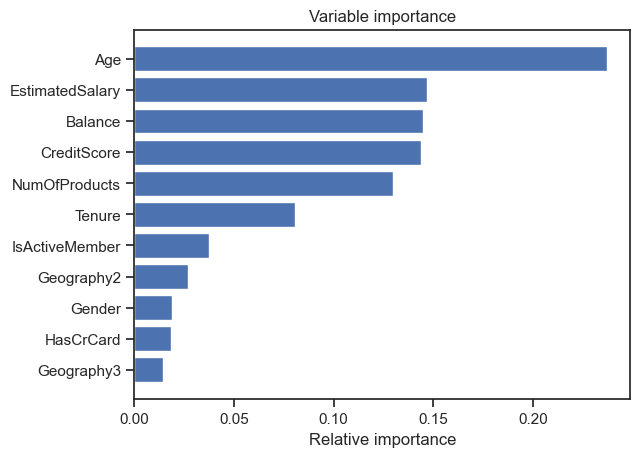

In [157]:
padding=np.arange(X_train_sc.size/len(X_train_sc))
plt.barh(padding,importances[sorted_idx],align='center')
plt.yticks(padding,features_arr[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Variable importance')

## Support vector Machine